# Exploring Seattle Airbnb Open Data

In this project, I analyze the opern dataset of Seattle AirBnB 2016 provided by Keggle. I want to answer the following questions with my analysis.

## Business Questions

* Which features are associated with higher prices?
* Is it possible to predict the prices based on the given features?
* How did the availability by property type develop over time?

Goal of my analysis is to provide insights for both hosts and travelers active on AirBnB.

## Data Analysis

#### load packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import datetime
%matplotlib inline

#### Read data and have a first look

In [54]:
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [53]:
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [227]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


#### Merge datasets

In [57]:
# neglect df_calendar due to limited informative value for our first two questions
df_listings.rename(columns={"id": "listing_id"}, inplace = True)
df = pd.merge(df_listings, df_reviews, on="listing_id")

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 0 to 84848
Data columns (total 97 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        84849 non-null  int64  
 1   listing_url                       84849 non-null  object 
 2   scrape_id                         84849 non-null  int64  
 3   last_scraped                      84849 non-null  object 
 4   name                              84849 non-null  object 
 5   summary                           75850 non-null  object 
 6   space                             81901 non-null  object 
 7   description                       84849 non-null  object 
 8   experiences_offered               84849 non-null  object 
 9   neighborhood_overview             66434 non-null  object 
 10  notes                             56690 non-null  object 
 11  transit                           70120 non-null  object 
 12  thum

### Data Cleansing

##### Remove columns that we do not need

In [9]:
# limited informative value for our questions
df = df.drop(columns=['listing_url','scrape_id', 'host_url','thumbnail_url', 'medium_url', 'picture_url','xl_picture_url', 
                      'reviewer_name', 'license','id','listing_id', 'notes', 'host_name','summary','space','name',
                      'neighborhood_overview', 'notes', 'transit', 'reviewer_id', 'host_about','host_id', 
                      'host_thumbnail_url', 'host_picture_url','last_scraped','description','experiences_offered',
                     'host_neighbourhood','market', 'country','calendar_last_scraped','first_review','last_review','jurisdiction_names',
                        'comments','host_location','host_listings_count','host_verifications','date','street','neighbourhood',
                      'smart_location','amenities','neighbourhood_group_cleansed','weekly_price', 'monthly_price','country_code','is_location_exact','calendar_updated'])

##### Convert data

In [10]:
# convert to datetime, extract year and check for how many years the person is host (we are currently in the year 2022)
df['host_since'] =  2022 - pd.to_datetime(df['host_since']).dt.year

In [11]:
# remove dollar signs from prices (and separators)
df.price = df.price.str[1:]
df.price = df.price.str.replace(',','').astype(float)
df.cleaning_fee = df.cleaning_fee.str[1:]
df.cleaning_fee = df.cleaning_fee.str.replace(',','').astype(float)
df.security_deposit = df.security_deposit.str[1:]
df.security_deposit = df.security_deposit.str.replace(',','').astype(float)
df.extra_people = df.extra_people.str[1:]
df.extra_people = df.extra_people.str.replace(',','').astype(float)

In [12]:
# convert percentages to floats
df.host_response_rate = df.host_response_rate.str[:-1]
df.host_response_rate = df.host_response_rate.str.replace(',','').astype(float)/100.0
df.host_acceptance_rate = df.host_acceptance_rate.str[:-1]
df.host_acceptance_rate = df.host_acceptance_rate.str.replace(',','').astype(float)/100.0

In [13]:
# convert booleans
df.host_is_superhost=df.host_is_superhost=="t"
df.host_has_profile_pic=df.host_has_profile_pic=="t"
df.host_identity_verified=df.host_identity_verified=="t"
df.has_availability=df.has_availability=="t"
df.requires_license=df.requires_license=="t"
df.instant_bookable=df.instant_bookable=="t"
df.require_guest_profile_picture=df.require_guest_profile_picture=="t"
df.require_guest_phone_verification=df.require_guest_phone_verification=="t"

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 0 to 84848
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_since                        84849 non-null  int64  
 1   host_response_time                81210 non-null  object 
 2   host_response_rate                81210 non-null  float64
 3   host_acceptance_rate              79409 non-null  float64
 4   host_is_superhost                 84849 non-null  bool   
 5   host_total_listings_count         84849 non-null  float64
 6   host_has_profile_pic              84849 non-null  bool   
 7   host_identity_verified            84849 non-null  bool   
 8   neighbourhood_cleansed            84849 non-null  object 
 9   city                              84849 non-null  object 
 10  state                             84849 non-null  object 
 11  zipcode                           84637 non-null  object 
 12  lati

##### Fix missing values

In [14]:
# check for missing values
df.isna().sum()/df.shape[0]

host_since                          0.000000
host_response_time                  0.042888
host_response_rate                  0.042888
host_acceptance_rate                0.064114
host_is_superhost                   0.000000
host_total_listings_count           0.000000
host_has_profile_pic                0.000000
host_identity_verified              0.000000
neighbourhood_cleansed              0.000000
city                                0.000000
state                               0.000000
zipcode                             0.002499
latitude                            0.000000
longitude                           0.000000
property_type                       0.000000
room_type                           0.000000
accommodates                        0.000000
bathrooms                           0.007177
bedrooms                            0.003418
beds                                0.000000
bed_type                            0.000000
square_feet                         0.949887
price     

In [15]:
# remove columns with high share of NAs 
df = df.drop(columns=['security_deposit','cleaning_fee', 'square_feet']) 

In [16]:
# Fill missing values with mode function
fill_mode = lambda col: col.fillna(col.mode()[0])

df['zipcode'] = df[['zipcode']].apply(fill_mode, axis=0)
df['bathrooms'] = df[['bathrooms']].apply(fill_mode, axis=0)
df['bedrooms'] = df[['bedrooms']].apply(fill_mode, axis=0)
df['host_response_time'] = df[['host_response_time']].apply(fill_mode, axis=0)

In [17]:
#Fill all missing values with the mean of the column
fill_mean = lambda col: col.fillna(col.mean())
df['host_response_rate'] = df[['host_response_rate']].apply(fill_mean, axis=0)
df['host_acceptance_rate'] = df[['host_acceptance_rate']].apply(fill_mean, axis=0)

In [18]:
# delete rows
df = df.dropna(subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                       'review_scores_checkin','review_scores_checkin','review_scores_communication',
                      'review_scores_location','review_scores_value'], axis=0)

In [19]:
#any NAs left?
df.isna().sum().sum()>0

False

### Question 1: Which features are associated with higher prices?

#### Checking correlations for numerical variables

In [20]:
# remove cat and boolean variables for correlation analysis
df_q1_num = df.copy()
df_cat_list = df_q1_num.select_dtypes(include=['object','bool']).columns
for var in df_cat_list:
    df_q1_num = df_q1_num.drop(var, axis=1)

In [21]:
df_q1_num.corr()["price"].sort_values(ascending=False)

price                             1.000000
accommodates                      0.614038
bedrooms                          0.550195
beds                              0.543817
guests_included                   0.479925
bathrooms                         0.406909
extra_people                      0.143626
review_scores_location            0.109266
host_total_listings_count         0.101850
review_scores_rating              0.055316
maximum_nights                    0.042337
minimum_nights                    0.028295
latitude                          0.019997
review_scores_cleanliness         0.006422
host_acceptance_rate              0.001479
review_scores_communication      -0.002329
calculated_host_listings_count   -0.007266
availability_30                  -0.012819
review_scores_checkin            -0.018581
review_scores_accuracy           -0.021758
host_since                       -0.022017
availability_365                 -0.024398
availability_60                  -0.034937
host_respon

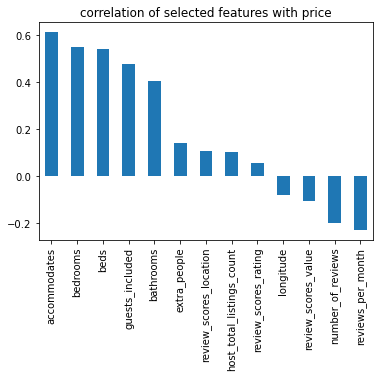

In [327]:
# plot features whose absolute correlation with price is greater than 5% (and exclude price)
df_q1_num.corr()["price"][(abs(df_q1_num.corr()["price"])>0.05) & (abs(df_q1_num.corr()["price"])<1)].sort_values(ascending=False).plot.bar(title='correlation of selected features with price');

* Features that describe the size of the appartment (accommodates, bedrooms, beds, guests_included, bathrooms) have the hightest correlation with the accommodations' prices.
* There is a negative correlation with features associated with reviews. It seems that cheaper accommodations tend to have a higher number of reviews and also higher review scores.
* Numerous features only show weak correlation factors and there is no clear evidence of a stochastic dependency with price (e.g., host_acceptance_rate, review_scores_communication, calculated_host_listing_count). Same applies to features linked to availability!
* Regarding the accommodations' location, only the longitude has a correlation greater than 5%. The higher the longitude, the lower the price. It is worth to have a detailed look at it again in the following.

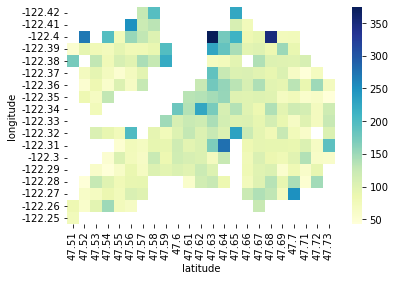

In [313]:
# heatmap with lon lat and price
df_q1_num.latitude = np.round(df_q1_num.latitude,2)
df_q1_num.longitude = np.round(df_q1_num.longitude,2)

heatmap1_data = pd.pivot_table(df_q1_num, values='price', 
                     index=['longitude'], 
                     columns='latitude')

sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.show()

#### Checking dependency with selected categorical variables

In [22]:
# let us now have a look at categorical variables
df_q1_cat = df.price
df_cat_list = df.select_dtypes(include=['object','bool']).columns
for var in df_cat_list:
    df_q1_cat = pd.concat([df_q1_cat, df[var]], axis=1)

In [23]:
# deep-dive: property_type
df_q1_cat.groupby("property_type").mean()["price"].sort_values(ascending=False)

property_type
Boat               279.242424
Condominium        131.745902
Chalet             128.916667
Apartment          115.832974
Townhouse          115.500448
Loft               109.713970
House              104.263482
Bungalow           103.121622
Yurt               100.000000
Treehouse           98.666667
Cabin               92.226852
Bed & Breakfast     85.614094
Other               74.991655
Camper/RV           74.304075
Tent                60.000000
Dorm                38.409091
Name: price, dtype: float64

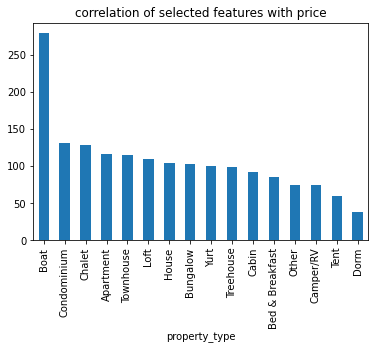

In [24]:
df_q1_cat.groupby("property_type").mean()["price"].sort_values(ascending=False).plot.bar(title='correlation of selected features with price');

* Based on a first look, the analysis matches my expectation. It only makes sense that (on average) prices go up the more exclusive the accomodation is. 
* However, the mean price of boat sticks out which makes a second look necessary. The sample size for each property type probably highly differs which makes a 'fair' comparison hard, i.e., outliers might distort the mean values.

In [26]:
df_q1_cat.groupby("property_type").count()["price"].sort_values(ascending=False)

property_type
House              40481
Apartment          36216
Cabin               1944
Loft                1811
Townhouse           1117
Bed & Breakfast      894
Condominium          732
Other                719
Camper/RV            638
Bungalow              74
Boat                  66
Tent                  32
Treehouse             30
Yurt                  25
Dorm                  22
Chalet                12
Name: price, dtype: int64

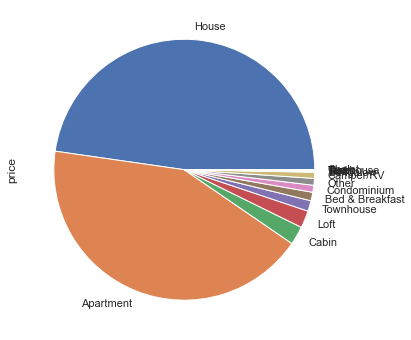

In [32]:
plot = df_q1_cat.groupby("property_type").count()["price"].sort_values(ascending=False).plot.pie(figsize=(11, 6))

The market is dominated by apartments and houses. Other types of accommodations (e.g., lofts, boats, or townhouses) can rarely be found on AirBnB. It only makes sense to have a closer look at the price distribution of each property type

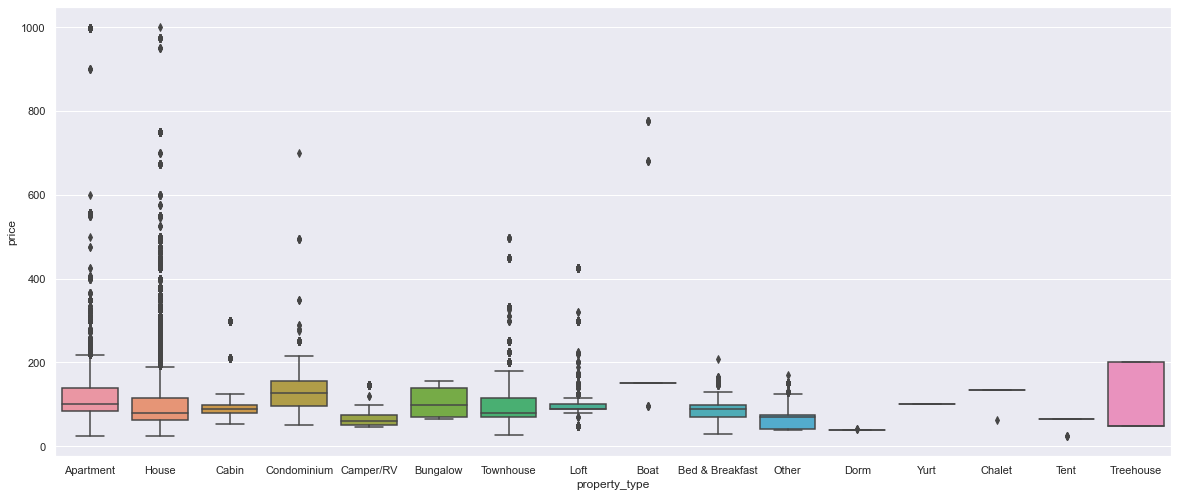

In [336]:
sns.boxplot(data=df_q1_cat, x="property_type", y="price", width = 0.8);
sns.set(rc={'figure.figsize':(30,8)})

For some types of property (e.g., boat) the medians are totally different than the previously computed mean which confirms the above stated issue of sample size. Still, also for the medians the hypothesis about exclusivity holds (cf., figure below). 

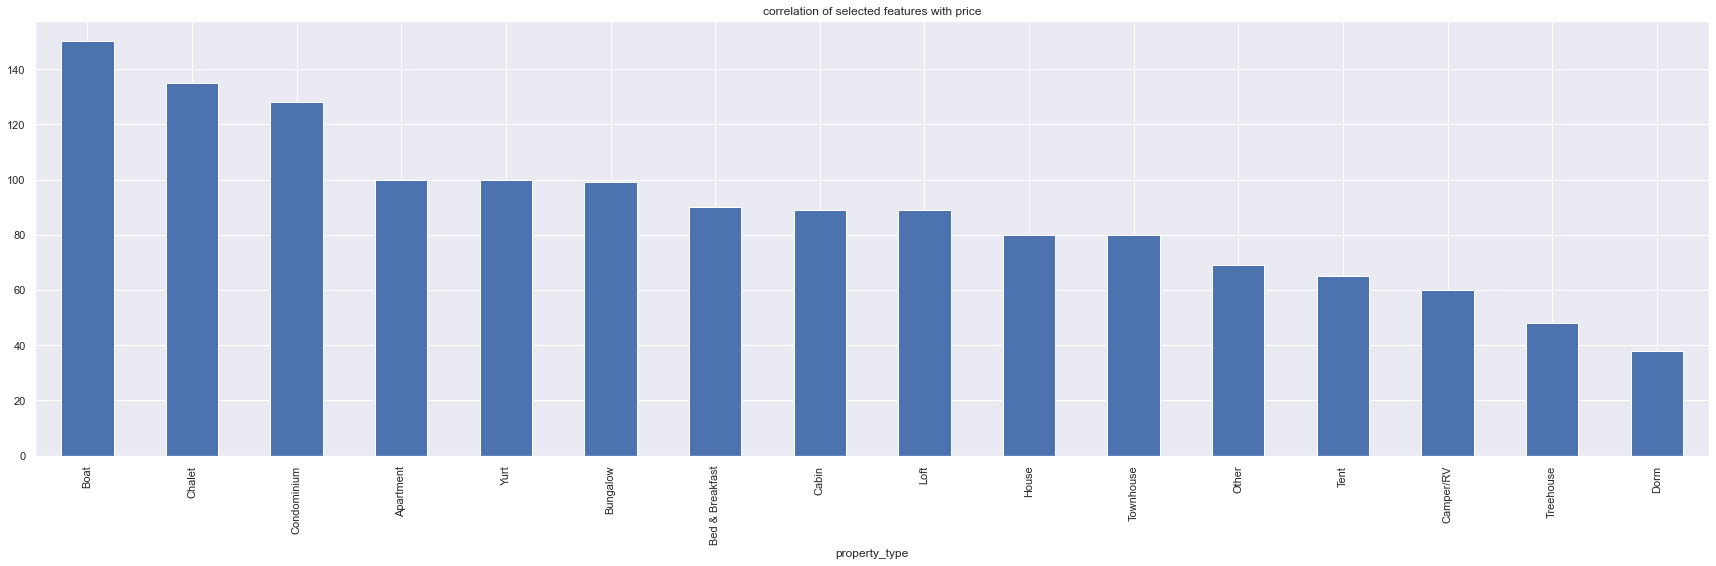

In [33]:
df_q1_cat.groupby("property_type").median()["price"].sort_values(ascending=False).plot.bar(title='correlation of selected features with price');

In the following, I analyze two additional features: bed_type and cancellation_policy.

In [296]:
df_q1_cat.groupby("bed_type").mean()["price"].sort_values(ascending=False)

bed_type
Real Bed         109.999130
Pull-out Sofa     94.139229
Airbed            74.579634
Futon             73.883314
Couch             43.301587
Name: price, dtype: float64

Here the expression 'you get for what you pay' seems to be true. Higher standards regarding the bed quality come with higher prices!

In [298]:
df_q1_cat.groupby("cancellation_policy").mean()["price"].sort_values(ascending=False)

cancellation_policy
strict      125.743316
moderate     99.410559
flexible     92.743205
Name: price, dtype: float64

It seems like the more expensive accommodations seem to have stricter cancellation policy. Given the fact, that the potential loss of the hosts (in case guests do not show up) is also higher, this also seems to be reasonable.

### Question 2: Is it possible to predict the prices based on the given features?

##### handling categorical variables

In [36]:
df_cat_list = df.select_dtypes(include=['object']).columns
df_q2 = df.copy()
for var in df_cat_list:
    # for each cat add dummy var, drop original column
    df_q2 = pd.concat([df_q2.drop(var, axis=1), pd.get_dummies(df_q2[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [37]:
df_q2.sample(3)

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
61439,8,1.0,1.0,False,2.0,True,True,47.618852,-122.326262,2,...,0,0,0,0,0,0,0,1,1,0
22686,9,1.0,1.0,False,1.0,True,True,47.595236,-122.309725,4,...,0,0,0,0,0,0,0,1,1,0
45288,9,1.0,1.0,True,1.0,True,True,47.585581,-122.311956,6,...,0,0,0,0,0,0,0,1,1,0


##### splitting data into training and testing set, training the model, and assessing it

In [38]:
#Split into explanatory and response variables
X = df_q2.drop(columns=['price']) 
y = df_q2['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(test_score, len(y_test))
#"The r-squared score for the model using only quantitative variables was {} on {} values.".format(train_score, len(y_train))

C:\Users\N14614\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


'The r-squared score for the model using only quantitative variables was 0.6343433891887169 on 25444 values.'

### Question 3: How did the availability by property type develop over time?

In [55]:
# now lets take care of the calendar dataset for question 3
df_calendar = df_calendar.drop(columns=['price'])
df_calendar.isna().sum()

listing_id    0
date          0
available     0
dtype: int64

In [62]:
df_calendar.date = pd.to_datetime(df_calendar['date'])
df_calendar.available=df_calendar.available=="t"

In [63]:
# get property type
df_q3 = pd.merge(df_listings[["listing_id","property_type"]], df_calendar, on="listing_id")

In [69]:
df_q3.head()

,listing_id,property_type,date,available
0,241032,Apartment,2016-01-04,True
1,241032,Apartment,2016-01-05,True
2,241032,Apartment,2016-01-06,False
3,241032,Apartment,2016-01-07,False
4,241032,Apartment,2016-01-08,False


In the following, we show the number of available accommodations by type over time.

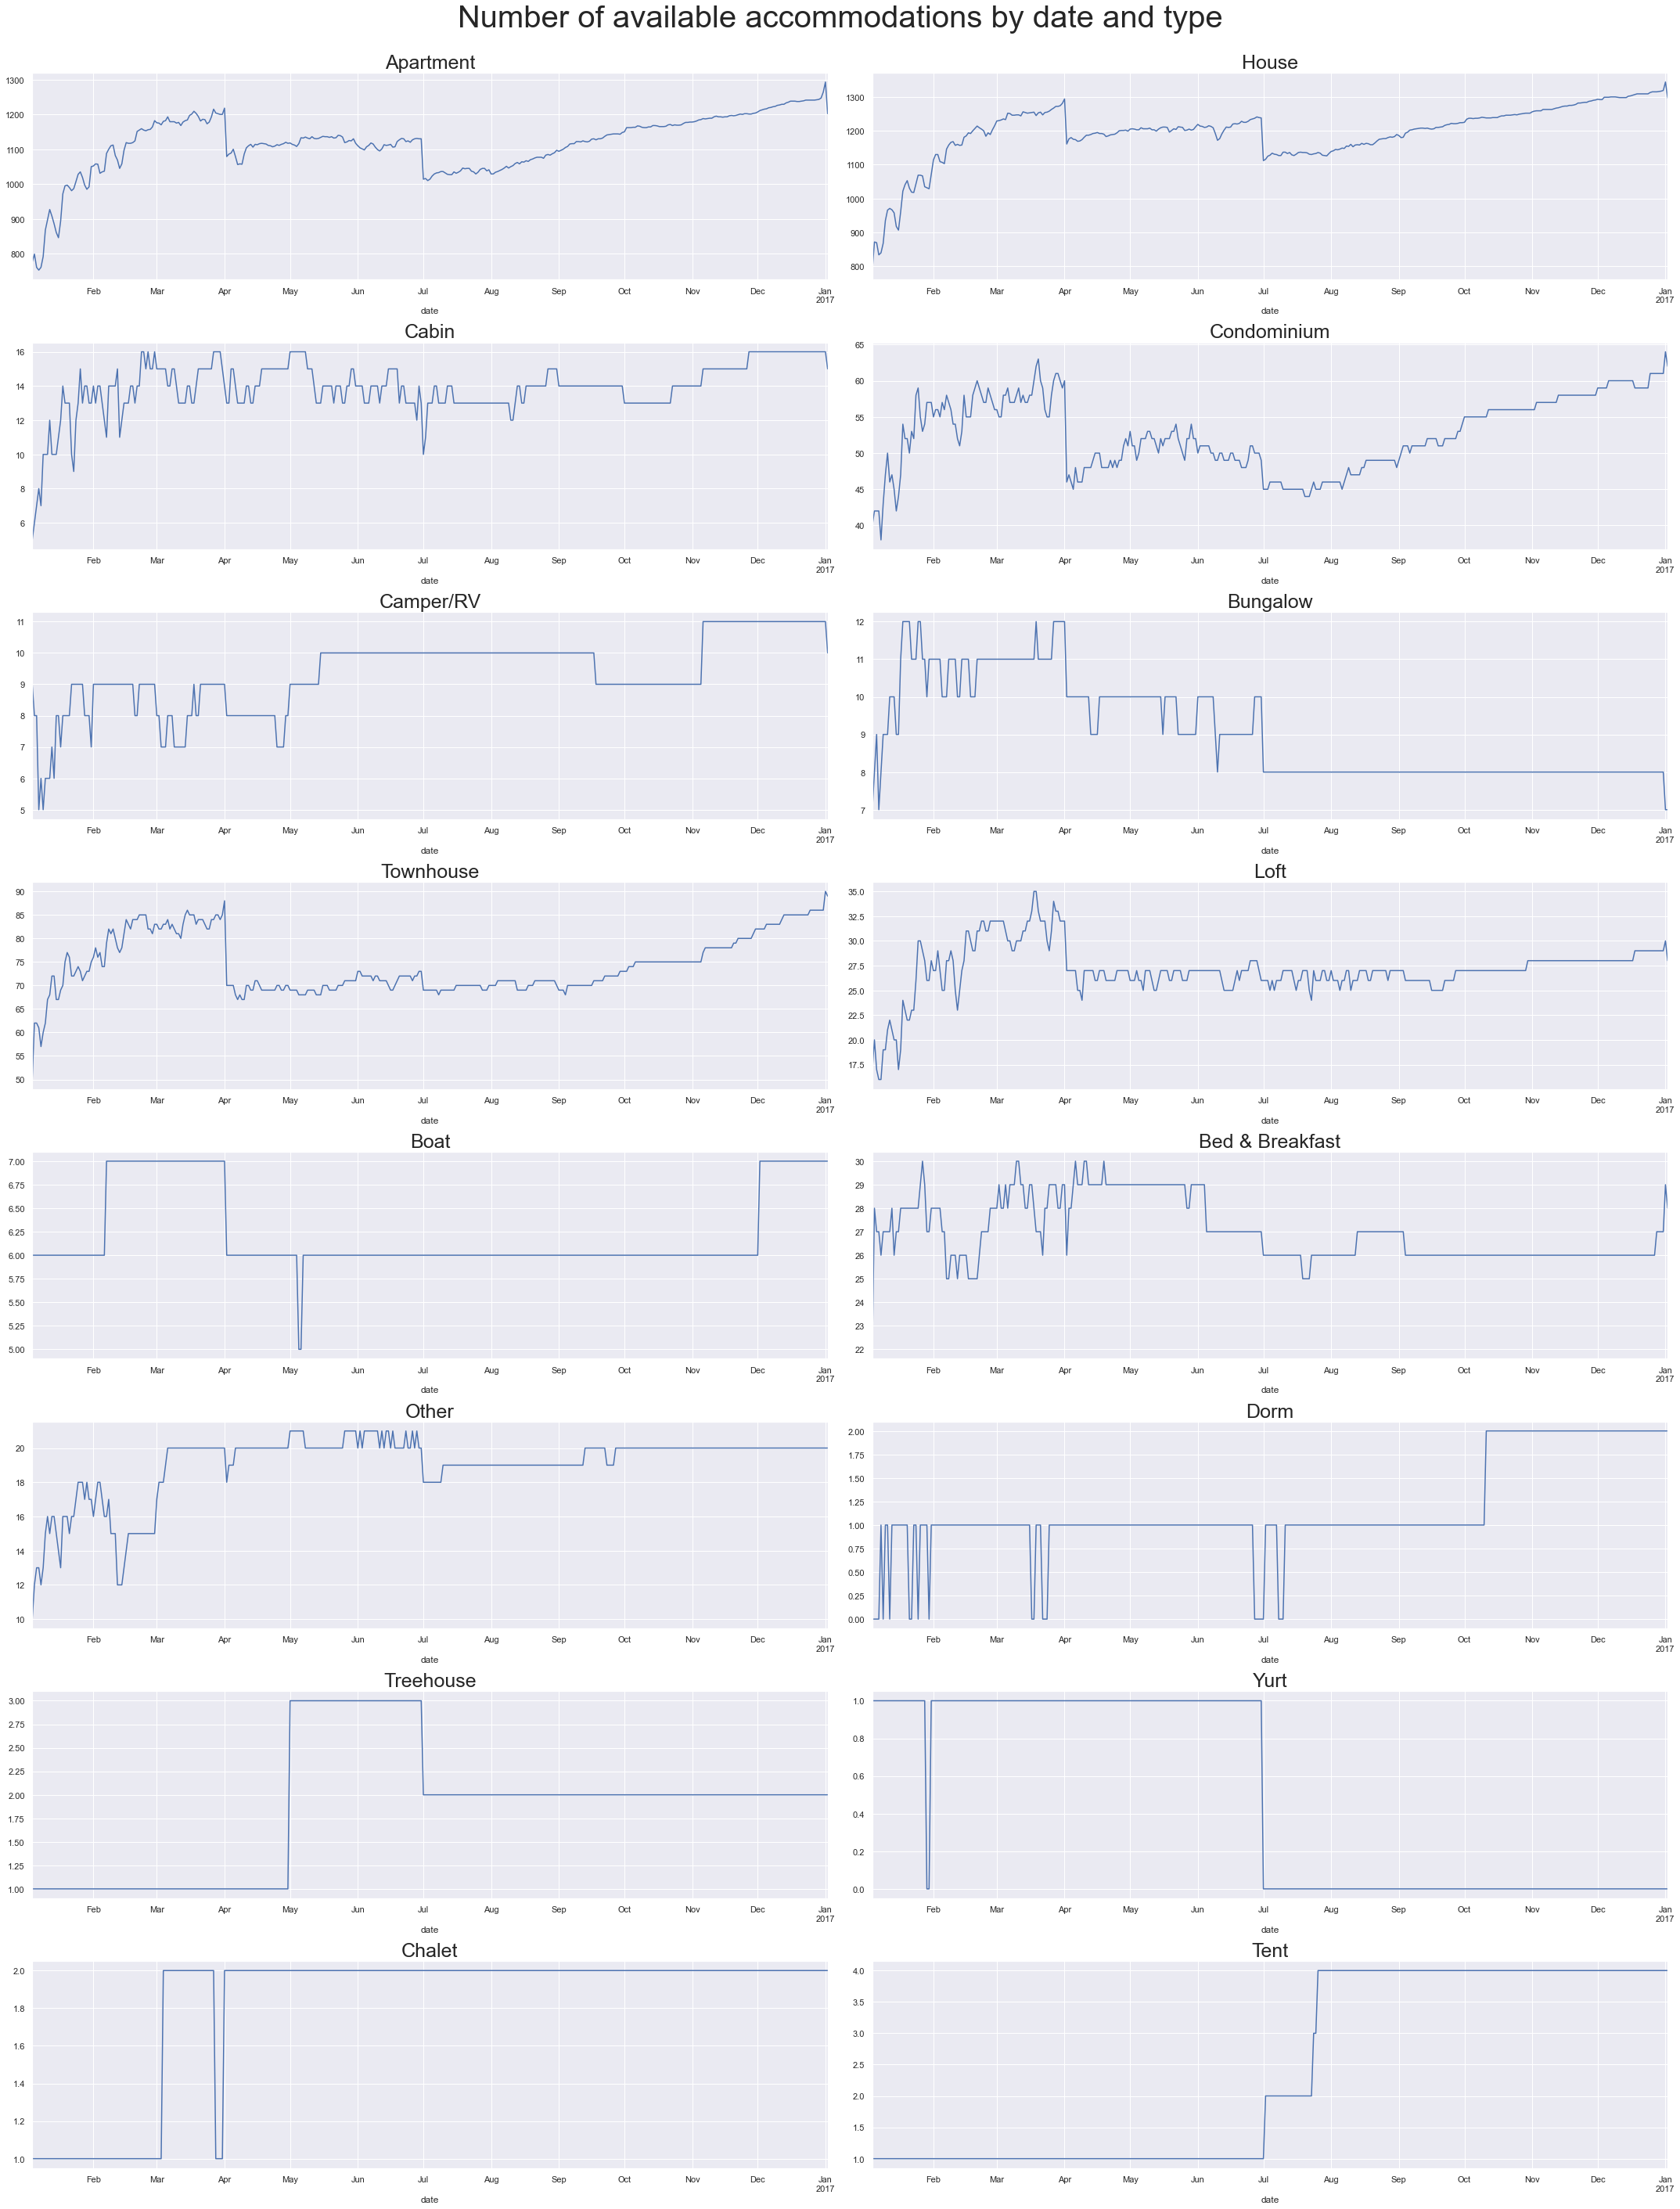

In [154]:
fig, axs = plt.subplots(8,2, figsize=(30, 40), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.9, wspace=.1)

axs = axs.ravel()

for i,type in enumerate(df_q3["property_type"].dropna().unique().tolist()):
    df_q3[df_q3.property_type==type].groupby("date")["available"].sum().plot(ax=axs[i]);
    axs[i].set_title(type, fontsize=25)
fig.suptitle('Number of available accommodations by type over date', fontsize=40) 
fig.tight_layout()
fig.subplots_adjust(top=0.95)

The figures do not show any clear seasonality. However, for most of the types there are some drops of availability from June to July probably due to holiday season in most countries.

When looking at Apartments and Houses which dominate our dataset, there is a clear upwards trend in the second half of the year. This could have two reasons: i) new accommodations enter the market and/or ii) availability increases. This could be a question for further investigations, i.e., the analyst could have a deeper look by including the listing_id.

### Outlook

My research is not without limitations. It only analyzes fractions of the underlying dataset to address the above introduced business questions. 

The data also includes various categorical variables that include continuous text in form of comments. Given that, the analysis would benefit from introducing Natural Language Processing (NLP). NLP could process the comments and convert them, e.g., into a numerical sentiment. By doing so, both i) correlations between the features and ii) our regression model could be extended.

Moreover, it makes sense to also use additional models on top of linear regression to predict prices (e.g., random forest or voting ensemble).